# Big Ideas Final Project
-------------------------

### Intro
This goal of this notebook is to find the best neighborhood in Pittsburgh. To do so, I will be analyzing the lifespan of people living in the different neighborhoods of Pittsburgh.

### Dataset
The Dataset I will be using tracks the median age at death (median lifespan) of people in Pittsburgh, split up by neighborhood. The dataset also breaks down the median age at death by race, with data for both black and white populations. The range of time tracked by the dataset is 2011-2015.

### Metric
The Metric I will be using to evaluate the neighborhoods is a combination of high total median age at death and low disparity between white and black populations.

In [2]:
## import pandas library and dataset

import pandas as pd

median_death = pd.read_csv("Slifer-nhoodmedianage20112015.csv")

## initial formatting
median_death.dropna(axis=0, how='any', inplace=True) # drop all rows with NaN
median_death.sort_values(by='TOTAL MD AGE AT DEATH', axis=0, inplace=True, ascending=False)

# drop last row (full of 0's)
median_death.drop(labels=0, axis=0, inplace=True)

median_death.set_index('NEIGHBORHOOD')


,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
NEIGHBORHOOD,,,,,,
SQUIRREL HILL SOUTH,58.0,83.2,721.0,86.2,802.0,85.9
NORTH OAKLAND,45.0,70.9,227.0,86.8,279.0,85.6
POINT BREEZE,13.0,66.7,158.0,85.7,175.0,85.1
SQUIRREL HILL NORTH,6.0,75.0,231.0,85.3,242.0,85.0
SWISSHELM PARK,0.0,0.0,67.0,83.1,67.0,83.1
...,...,...,...,...,...,...
MANCHESTER,97.0,67.2,15.0,70.0,113.0,67.4
ALLENTOWN,41.0,55.6,82.0,72.1,126.0,66.5
EAST ALLEGHENY,51.0,62.7,100.0,70.0,157.0,66.2


Now that we have a cleaned dataset, we can begin to sift out the information we want.

Namely **TOTAL MD AGE AT DEATH**, **White MD AGE AT DEATH**, and **Black MD AGE AT DEATH**.

In [3]:
try:
    median_death.drop(['BLACKdeaths', 'WHITEdeaths', 'TOTALdeaths*'], axis=1, inplace=True)
except KeyError:
    pass
median_death.set_index('NEIGHBORHOOD')

,Black MD AGE AT DEATH,White MD AGE AT DEATH,TOTAL MD AGE AT DEATH
NEIGHBORHOOD,,,
SQUIRREL HILL SOUTH,83.2,86.2,85.9
NORTH OAKLAND,70.9,86.8,85.6
POINT BREEZE,66.7,85.7,85.1
SQUIRREL HILL NORTH,75.0,85.3,85.0
SWISSHELM PARK,0.0,83.1,83.1
...,...,...,...
MANCHESTER,67.2,70.0,67.4
ALLENTOWN,55.6,72.1,66.5
EAST ALLEGHENY,62.7,70.0,66.2


The pertinent data has now been extracted from the dataset. We can now begin visualizing.

First, a bar plot of the neighborhoods with the highest total median age at death:

<Axes: xlabel='NEIGHBORHOOD'>

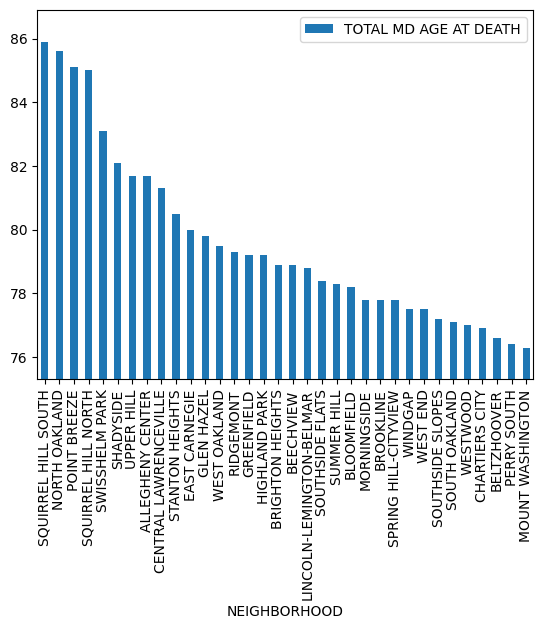

In [4]:
# plot by total md age at death
plotdf = median_death.head(34)
min_val = plotdf['TOTAL MD AGE AT DEATH'].min()
max_val = plotdf['TOTAL MD AGE AT DEATH'].max()

plotdf.plot.bar(x='NEIGHBORHOOD', ylim=(min_val-1, max_val+1), y='TOTAL MD AGE AT DEATH')
# median_death.sort_values(by='White MD AGE AT DEATH', axis=0, inplace=False, ascending=False).head(34).plot.bar(x='NEIGHBORHOOD', ylim=(min_val, max_val), y='White MD AGE AT DEATH')

While the above is a good visualization of the data, we would also like to look at the discrepancy between white and black populations.

The next code section will compute the difference of the two sets and plot the first few values:

Mean disparity: 14.523529411764706


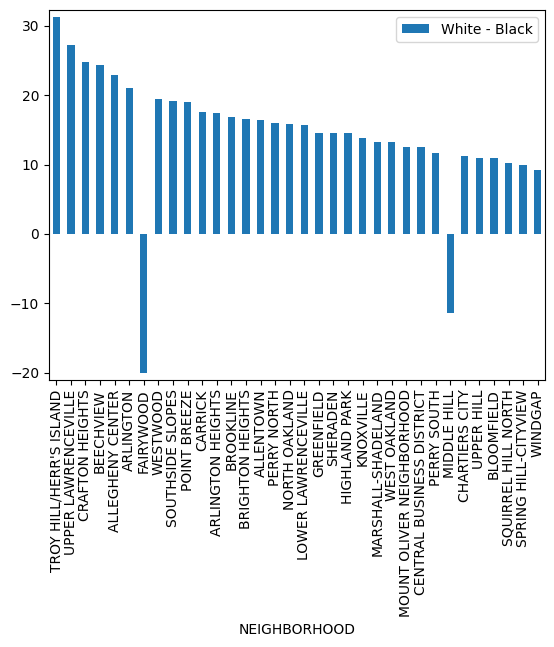

In [5]:
plotdf = median_death.copy()
for row in plotdf.iloc[0:, 0:3].itertuples():
    if(row[1] == 0 or row[2] == 0):
            plotdf.drop(row[0], inplace=True)

plotdf['White - Black'] = plotdf['White MD AGE AT DEATH'] - plotdf['Black MD AGE AT DEATH']
# print(median_death)

dispdf = plotdf.sort_values(by='White - Black', key=abs, ascending=False) # take a snapshot before additional processing
plotdf = dispdf.head(34)

min_val = plotdf['White - Black'].min()
max_val = plotdf['White - Black'].max()
plotdf.plot.bar(x='NEIGHBORHOOD', ylim=(min_val-1, max_val+1), y='White - Black')
print("Mean disparity:", plotdf['White - Black'].mean())

This bar chart allows us to see the neighborhoods with the most disparity between white and black median age at death, with a positive disparity meaning the white population had a higher value, and a negative value meaning the black population had a higher value.

As you can see, most neighborhoods largely favor white populations, but this is not part of the metric and I will just be focusing on the magnitude of the disparity.

The average disparity between the neighborhoods is ~14.5 years.

### How to find the Best Neighborhood?

In addition to having a high total median age at death, for a neighborhood to be the best, it should have a low disparity between white and black populations.

To find the best neighborhood by these two metrics, we can compare the bottom end of the disparity data with the top end of the total data and see if there are any overlapping neighborhoods.

By incrementally increasing the range from the top (or bottom) that we are searching, we can create an list of neighborhoods ordered from best to worst.

In [6]:
best_neighborhoods = []
for i in range(10, max(len(dispdf), len(median_death))):
    for disp in dispdf.tail(i)['NEIGHBORHOOD']:                    # restricts to the bottom i neighborhoods by disparity
        for total in median_death.head(i)['NEIGHBORHOOD']:         # restricts to the top i neighborhoods by total md age
            if(disp == total and disp not in best_neighborhoods):  # checks for overlapping neighborhoods
                best_neighborhoods.append(disp)

for i in range(len(best_neighborhoods)):
    print(f"{i+1}: {best_neighborhoods[i]}")

1: SHADYSIDE
2: SQUIRREL HILL SOUTH
3: GLEN HAZEL
4: SOUTHSIDE FLATS
5: CENTRAL LAWRENCEVILLE
6: SUMMER HILL
7: WEST END
8: LINCOLN-LEMINGTON-BELMAR
9: MORNINGSIDE
10: SOUTH OAKLAND
11: STANTON HEIGHTS
12: EAST CARNEGIE
13: BELTZHOOVER
14: WINDGAP
15: SPRING HILL-CITYVIEW
16: MOUNT WASHINGTON
17: SQUIRREL HILL NORTH
18: BLOOMFIELD
19: LARIMER
20: UPPER HILL
21: CHARTIERS CITY
22: CRAWFORD ROBERTS
23: PERRY SOUTH
24: CENTRAL BUSINESS DISTRICT
25: MOUNT OLIVER NEIGHBORHOOD
26: WEST OAKLAND
27: GARFIELD
28: HIGHLAND PARK
29: POINT BREEZE NORTH
30: EAST LIBERTY
31: GREENFIELD
32: STRIP DISTRICT
33: LOWER LAWRENCEVILLE
34: MIDDLE HILL
35: NORTH OAKLAND
36: HAZELWOOD
37: PERRY NORTH
38: POLISH HILL
39: SHERADEN
40: BRIGHTON HEIGHTS
41: ELLIOTT
42: BROOKLINE
43: CENTRAL NORTHSIDE
44: KNOXVILLE
45: CARRICK
46: BEDFORD DWELLINGS
47: POINT BREEZE
48: FRIENDSHIP
49: SOUTHSIDE SLOPES
50: FINEVIEW
51: WESTWOOD
52: MARSHALL-SHADELAND
53: ARLINGTON
54: BLUFF
55: ALLEGHENY CENTER
56: CALIFORNIA-KIRKBR

In [8]:
dispdf.describe()

,Black MD AGE AT DEATH,White MD AGE AT DEATH,TOTAL MD AGE AT DEATH,White - Black
count,66.000000,66.000000,66.000000,66.000000
mean,67.924242,76.665152,75.184848,8.740909
std,8.097009,6.950362,5.520653,9.542197
min,42.500000,42.500000,53.300000,-20.000000
25%,62.850000,73.050000,72.050000,2.050000
50%,69.000000,77.650000,75.600000,8.700000
75%,73.950000,80.275000,78.700000,15.425000
max,83.200000,88.400000,85.900000,31.300000


### Conclusion

By following the above process, one neighborhood comes out on top: **Shadyside**, with the following stats:
* **TOTAL MD AGE AT DEATH** = 82.1 years
* **White - Black Disparity** = 1.2 years

The rest of the top 5:

2. Squirrel Hill South
3. Glen Hazel
4. Southside Flats
5. Central Lawrenceville

Unfortunately, I do not have much experience living in Pittsburgh so I do not have a personal favorite to compare to. Currently, I have the most experience living in North Oakland, so I would probably say it's my favorite neighborhood by default. However, I do not believe it is right to criticize the data without having experience of my own.


In [14]:
# writing list to a file for easier moving around
with open("Slifer-ranking.csv", "w+") as f:
    f.write("RANK,NEIGHBORHOOD\n")
    for index, value in enumerate(best_neighborhoods):
        f.write(f"{index+1},{value}\n")
        

In [16]:
ranking = pd.read_csv("Slifer-ranking.csv")
ranking.set_index('RANK')

,NEIGHBORHOOD
RANK,
1,SHADYSIDE
2,SQUIRREL HILL SOUTH
3,GLEN HAZEL
4,SOUTHSIDE FLATS
5,CENTRAL LAWRENCEVILLE
...,...
61,UPPER LAWRENCEVILLE
62,ALLENTOWN
63,TROY HILL/HERR'S ISLAND
